In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
price_oil = pd.read_csv(
    "data/BrentOilPrices.csv", dtype={"Price": float}
)
print("price_oil shape ->", price_oil.shape)
price_oil.set_index("Date",inplace=True)
price_oil.index=pd.to_datetime(price_oil.index)
price_oil.head()


price_oil shape -> (8554, 2)


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


<AxesSubplot:xlabel='Date'>

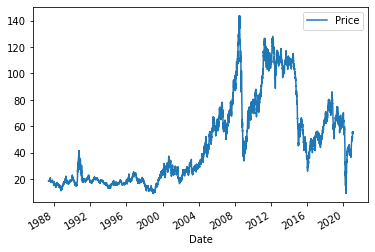

In [3]:
price_oil.plot()

In [4]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(price_oil['Price'])
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -2.119949830990847,
 'pvalue': 0.2365687047236168,
 'usedlag': 29,
 'nobs': 8524,
 'criticalvalues': {'1%': -3.4311173944575892,
  '5%': -2.861879136234893,
  '10%': -2.5669505173087894},
 'icbest': 25771.30509388212}

<AxesSubplot:xlabel='Date'>

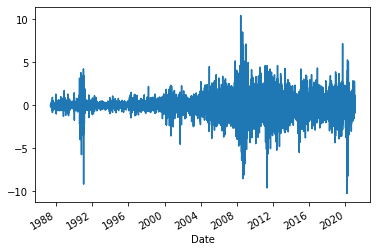

In [5]:
price_oil['1difference']=price_oil['Price']-price_oil['Price'].shift(1)
price_oil['1difference'].plot()

In [6]:
result=adfuller(price_oil['1difference'].dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -14.862737126965929,
 'pvalue': 1.709470851291234e-27,
 'usedlag': 28,
 'nobs': 8524,
 'criticalvalues': {'1%': -3.4311173944575892,
  '5%': -2.861879136234893,
  '10%': -2.5669505173087894},
 'icbest': 25771.76370933242}

<AxesSubplot:xlabel='Date'>

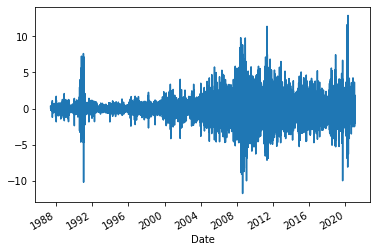

In [7]:
price_oil['2difference']=price_oil['1difference']-price_oil['1difference'].shift(1)
price_oil['2difference'].plot()

In [8]:
result=adfuller((price_oil['2difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -25.9270018492372,
 'pvalue': 0.0,
 'usedlag': 37,
 'nobs': 8514,
 'criticalvalues': {'1%': -3.431118296062019,
  '5%': -2.8618795346313055,
  '10%': -2.566950729378339},
 'icbest': 25925.99362140089}

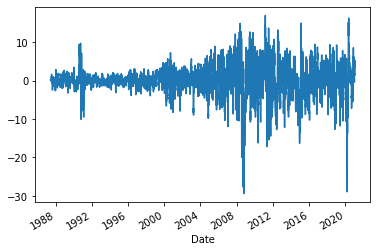

In [9]:
price_oil['Seasonal_Difference']=price_oil['Price']-price_oil['Price'].shift(12)
ax=price_oil['Seasonal_Difference'].plot()

In [10]:
result=adfuller((price_oil['Seasonal_Difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -10.779677702511533,
 'pvalue': 2.2720326646256378e-19,
 'usedlag': 37,
 'nobs': 8504,
 'criticalvalues': {'1%': -3.4311191997875143,
  '5%': -2.861879933964842,
  '10%': -2.566950941946748},
 'icbest': 27357.88947915453}

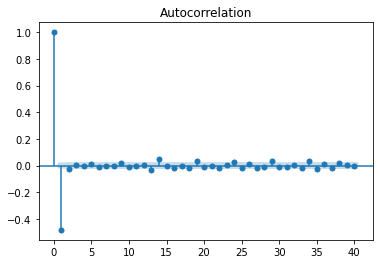

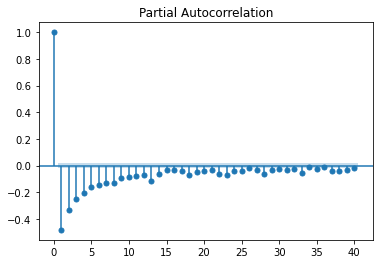

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig1=plot_acf(price_oil['2difference'].dropna())
fig2=plot_pacf(price_oil['2difference'].dropna())

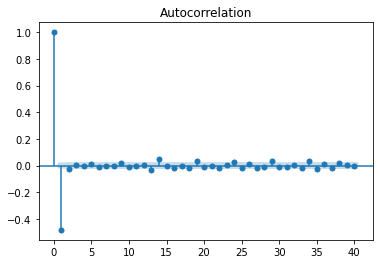

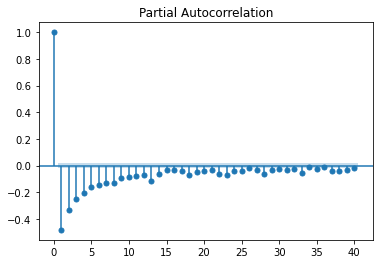

In [12]:
fig1=plot_acf(price_oil['2difference'].dropna())
fig2=plot_pacf(price_oil['2difference'].dropna())

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(price_oil['Price'],order=(1,2,1),seasonal_order=(1, 0, 0, 12))

D:\Program Files\Anaconda3\envs\ds-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Program Files\Anaconda3\envs\ds-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [14]:
result=model.fit()

<AxesSubplot:ylabel='Density'>

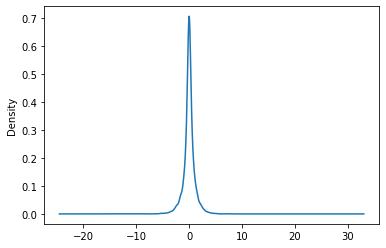

In [15]:
result.resid.plot(kind='kde')

In [16]:
from pandas.tseries.offsets import DateOffset
new_dates=[price_oil.index[-1]+DateOffset(days=x) for x in range(1,4)]
pred=pd.DataFrame(result.predict(start=price_oil.shape[0]+1,end=price_oil.shape[0]+len(new_dates)))
pred['date']=new_dates
pred.set_index('date',inplace=True)
pred.columns=['pred']

D:\Program Files\Anaconda3\envs\ds-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [17]:
pred

,pred
date,
2021-01-26,55.461276
2021-01-27,55.473138
2021-01-28,55.473539


In [25]:
merged_df=pd.concat([price_oil,pred])[["Price","pred"]][-30:]

<AxesSubplot:>

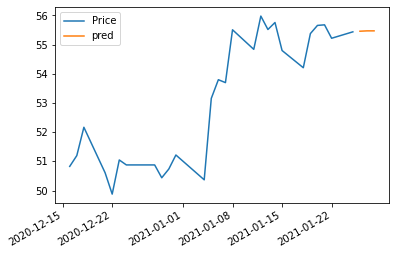

In [26]:
merged_df.plot()